# Final Project

by:

*   Alec Ding, UID: 118754499
*   Anvay Panguluri, UID: 119227169
*   Katherine Krotkov, UID: 118852690
*   Tanmay Panguluri, UID: 119227213








Part 1: Data Preprocessing

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from math import sqrt
import gdown

In [ ]:
# Downloads the .csv file containing our dataset
url = "https://drive.google.com/uc?id=1yexdWwAjBcYM58T-J2J4d_pEhOx494FF"
output = "books.csv"
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1yexdWwAjBcYM58T-J2J4d_pEhOx494FF
To: /content/books.csv
100%|██████████| 1.56M/1.56M [00:00<00:00, 14.2MB/s]


'books.csv'

In [ ]:
books_df = pd.read_csv("books.csv", on_bad_lines='skip')
books_df.columns = [col.strip() for col in books_df.columns]
books_df

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
...,...,...,...,...,...,...,...,...,...,...,...,...
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco


In [ ]:
books_df.dtypes

,0
bookID,int64
title,object
authors,object
average_rating,float64
isbn,object
isbn13,int64
language_code,object
num_pages,int64
ratings_count,int64
text_reviews_count,int64


All data is already in the desired format.

Part 2: Basic Data Exploration and Summary Statistics

In [ ]:
books_df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


Test 1: Let us use the ANOVA test to analyze the relationship between language and the number of reviews.

$H_0$: Language has no effect on the number of reviews.

$H_A$: Language has an effect on the number of reviews.

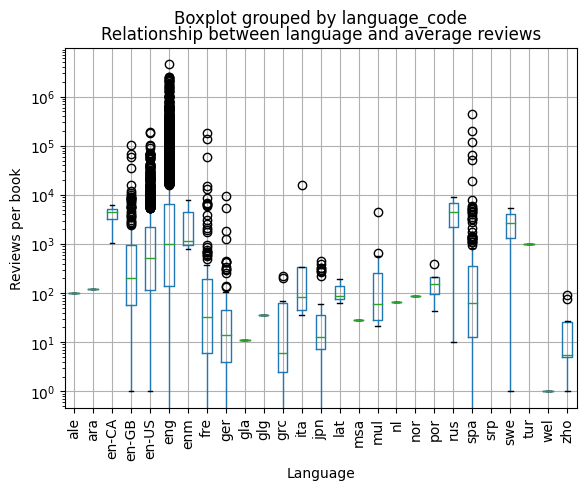

In [ ]:
books_df[["language_code", "ratings_count"]].boxplot(by="language_code")
plt.xlabel("Language")
plt.ylabel("Reviews per book")
plt.title("Relationship between language and number of reviews")
plt.yscale("log")
plt.xticks(rotation=90)
plt.show()

As we can see from the boxplot, there is a decent variation between the languages for the number of reviews books get. There also appears to be a lot of extremely highly reviewed outlier books in the dataset as well.

In [ ]:
samples = [x[1] for x in books_df.groupby("language_code")["ratings_count"]]
f_val, p_val = stats.f_oneway(*samples)
p_val

0.007455479720260833

Assume $\alpha = 0.05$. As can be seen by the p-value, which is lower than $\alpha$, language has a statistically significant effect on the number of reviews that a book has. This is likely due to different languages having a larger reader base than other, more niche languages, or simply that Goodreads is an English website, and that English-like Indo-European language are more supported and popular to host than other languages, which would be hosted on a different site.

Test 2: Let us perform an ANOVA test to measure whether the means of the average rating for a publisher's set of books differ from each other.

H$_{0}$: The mean average rating of books do not differ based on the books' publishers.

H$_{a}$: The mean average rating of books do differ based on the books' publishers.


In [ ]:
test1_group = books_df.groupby("publisher")['average_rating'].apply(list)
f_statistic, p_value = stats.f_oneway(*test1_group)
f_statistic, p_value

(3.3824404611437524, 0.0)

We use α = 0.05. The p-value = 0.00. 0.00 < 0.05, therefore we reject the null hypothesis and conclude that the mean average rating of books do differ based on their publishers.

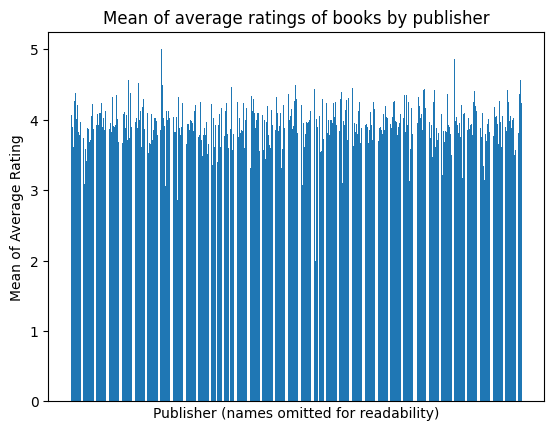

In [ ]:
avg_rating_by_publisher = books_df.groupby("publisher")['average_rating'].mean()
avg_rating_by_publisher
plt.bar(avg_rating_by_publisher.index, avg_rating_by_publisher.values)
plt.title("Mean of average ratings of books by publisher")
plt.xticks([])
plt.xlabel("Publisher (names omitted for readability)")
plt.ylabel("Mean of Average Rating")
plt.show()

Test 3: Relationship between average number of pages and language

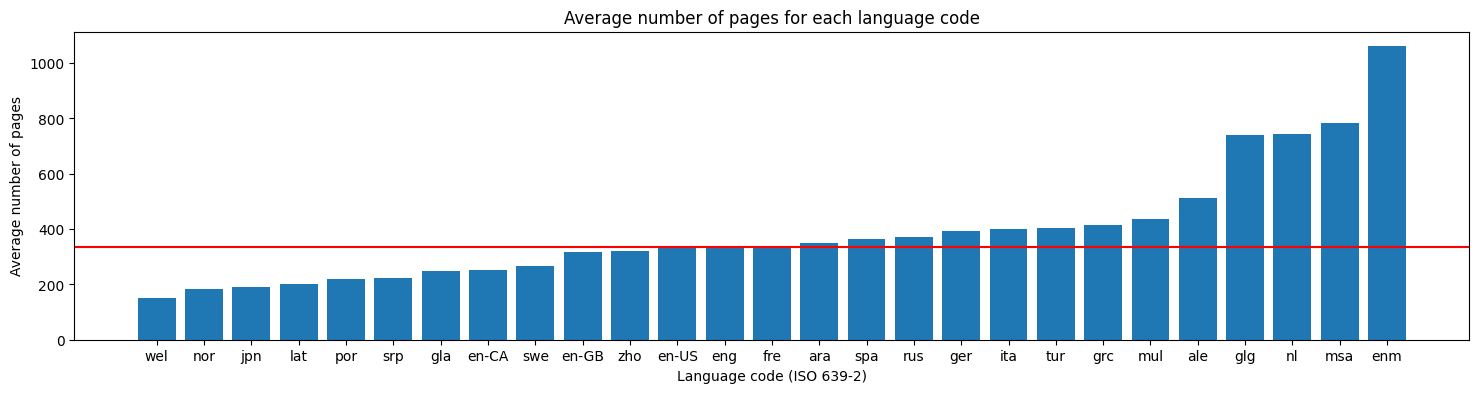

In [ ]:
avg_page_per_language = books_df.groupby("language_code")['num_pages'].mean().sort_values()
plt.figure(1, [18, 4])
mean_pages = books_df['num_pages'].mean()
plt.title("Average number of pages for each language code")
plt.xlabel("Language code (ISO 639-2)")
plt.ylabel("Average number of pages")
plt.axline((0,mean_pages),slope=0,color="red")
plt.bar(avg_page_per_language.index, avg_page_per_language.values)
plt.show()

While it's clear that there are some big outliers, mainly "enm", which is Middle English, most of the values hover around the red line, which is the mean number of pages across all languages. The median, at 299 compared to the mean of approximately 336, is also quite close to the mean, so there isn't much of a skew; there are outliers on both ends, although the outliers on the higher end tend to deviate from the mean more than the outliers on the lower end.

To look at a concrete example, we can use a Z-test to see if the mean for Japanese is significantly different than the overall mean. Japanese is chosen because it's not incredibly close to the mean but not as much of an outlier as Middle English, and because there are more Japanese books in the database than those of many other languages. The below code shows that there are 46 books in Japanese in the data set, which is enough for a Z-test.

In [ ]:
len(books_df[books_df['language_code'] == 'jpn'])

46


$H_0$: The mean number of pages for Japanese books is not significantly different from the mean number of pages for all books.

$H_a$: The mean number of pages for Japanese books is significantly different from the mean number of pages for all books.

Pick $\alpha = .05$. This will be a one-tailed test, since we can see from the graph that the mean is lower. With this $\alpha$, the critical value for a left-tailed Z-test is $-1.6448536$.

To conduct the Z-test, all we need to do is calculate the z-score and compare it to the critical value.

In [ ]:
jpn_mean = books_df[books_df['language_code'] == 'jpn']['num_pages'].mean()
std_pages = books_df['num_pages'].std()
zscore = (jpn_mean-mean_pages)/(std_pages)
zscore

-0.603501578994514

The Z-score is greater than the critical value of $-1.6448536$, so we fail to reject the null hypothesis; it's possible that the books being in Japanese may not have an effect on the page count.

**Book Popularity Prediction:**

Question: Can we predict the popularity of a book based on its attributes?
ML Technique: Regression analysis (e.g., linear regression, random forest regressor) to predict numeric popularity metrics such as ratings or the number of reviews.


**Genre Classification:**

Question: Can we classify books into their respective genres using metadata?
ML Technique: Supervised classification algorithms (e.g., logistic regression, SVM, or neural networks).
Features: Use text data (e.g., book descriptions) and metadata like author or publisher.


**Recommender System:**

Question: How can we recommend similar books based on user preferences?
ML Technique: Collaborative filtering or content-based recommendation using similarity metrics.


~~**Sentiment Analysis on Reviews:**~~

~~Question: What is the sentiment distribution across books or genres?~~
~~ML Technique: Natural Language Processing (NLP) for text classification using tools like transformers or naive Bayes.~~
~~Visualization: Sentiment trends per genre or over time.~~


**Outlier Detection in Ratings:**

Question: Are there anomalies in book ratings or review counts?
ML Technique: Unsupervised learning like clustering (e.g., k-means) or outlier detection methods.
Insights: Identify books with unexpectedly high or low performance.


~~**Topic Modeling of Book Descriptions:**~~

~~Question: What themes or topics are most common in book descriptions?~~
~~ML Technique: Latent Dirichlet Allocation (LDA) or other topic modeling techniques.~~


**Author Analysis:**

Question: What patterns emerge from analyzing books by the same author?
ML Technique: Clustering or association rule mining for understanding trends.


~~**Price Prediction:**~~

~~Question: Can we predict the price of a book based on its features?~~
~~ML Technique: Regression analysis using features like page count, genre, and publication year.~~


**Trend Analysis:**

Question: How have themes, genres, or book lengths evolved over time?
ML Technique: Time-series analysis to uncover trends.
Visualization: Use line plots and heatmaps.

1.  
Book Popularity Prediction:

Question: Can we predict the popularity of a book based on its attributes? ML Technique: Regression analysis (e.g., linear regression, random forest regressor) to predict numeric popularity metrics such as ratings or the number of reviews.

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt
import numpy as np